# Overview
#### The goal of examining this data is to find how to maximize profits for a taxi driver who will drive 10 hours per week. This data exploration will focus on the variables that can be controlled by the taxi driver.
#### Those things are:
- Location
- Time of day
- Day of week
- Taxicab vs taxivan

#### My report will be structured in the following form:
- Data Inspection
- Assumptions and Cleanup
- Analysis
- Conclusion
- Complications
- Desired Additions of Data

## Data Inspection

During data inspection, many variables were plotted as well as additional variables being created.

The variables that were added are:
- Trip duration (in seconds)
- Time of day pickup and time of day dropoff (in hours)
- Day of week pickup and day of week dropoff
- Hour of week pickup and hour of week dropoff
- Borough

By plotting the data, one can see the most popular times for pickup are between 6pm and midnight, and the most popular days for pickup are Thursday and Friday. The vast majority of rides are 1 or 2 passengers, and Manhatten is the most popular borough. Upon initial inspection, none of the results are particularly surprising.


## Assumptions and Cleanup
### Assumptions:
- Trip duration is greater than 1 minute and less than 1.5 hours, as anything outside these bounds is viewed as an outlier
- Data with only a date and no hour, minute, second for pickup of dropoff will be discarded
- Data with a passenger count of 0 will be discarded
- Trip distances over 30 miles will be discarded, as these are viewed as outliers
- Negative fare amounts and fair amounts over \$200 will be discarded as outliers or bad data
- Tip amounts above \$100 will be discarded as these are viewed as outliers
- A profit per minute below \$0 is viewed as bad data
- A profit per minute above \$15 is seen as an outlier
- Passenger counts greater than 6 are dropped as there are so few of these datapoints to make any meaningful conclusions

The data was cleaned according to these assumptions.

## Analysis
The analysis consisted of three parts. First running regressions against key predictors and criterion variables.
The predictors were:
- Day of week
- Passenger count
- Payment type
- Time of day pickup
- Zone
- Borough

The criterion variables used were:
- Profit per minute
- Profit per ride

Second correlation heatmaps were generated between the key predictors and criterion variables.

Finally, the predictors and criterion variables were plotted against each other with the predictor on the x axis and the criterion on the y axis.

All three forms of analysis lead to similar conclusions that can be found conclusions section below.

## Conclusions

### Location Conclusions
#### Profit Per Minute
When choosing what location to drive your taxicab, a couple things could be important. A driver might want to maximize how much they are making per minute or they might want to maximize how much they make per ride. Maximizing per minute should lead to higher overall returns, but maximizing per ride could be a strategy to decrease the amount of time they do not have a passenger in their taxi.

By running a linear regression on the data we can find that zones that will generate the highest revenue per minute.  the best zones for revenue per minute are:
- Yorkville West
- Lenox Hill West
- Upper East Side South
- Upper East Side North
- Upper West Side South
- Upper West Side North

Now it might be hard as a taxi driver to stay in one zone, however looking at a map, Upper East Side North, Upper East Side South, Yorkville West, and Lenox Hill West are right next to each other, and Upper West Side South and Upper West Side North are on the other side of Central Park. Staying in this area, would be the quickest way to drive up your rate per minute pay.

Surprisingly, even though Manhatten contains the top 6 zones for profit per minute, the borough of Manhatten as a whole does not do too well in generating profit per minute. When running a regression against the boroughs and profit per minute, Staten Island and the Bronx fare the best. However, the borough regression had a low R-squared value, but also had low P values, suggesting there is high variability in the data, but also that the borough is a significant predictor in profit per minute. The regression against the boroughs provides interesting data, but should be taken with a grain of salt.

#### Profit Per Ride
An alternative to looking at profit per minute would be to look at profit per ride. One of the biggest expenses a taxi drive might face is when there cab is empty. The longer they have to wait between passengers, the less rides they will give, resulting in less profits. If we assume the amount of time it takes to get a new passenger is uniform at different locations, taking fewer, longer trips will result in higher overall profits.

By running a linear regression, two zones were clear favorites for producing the most profit per ride:

The best zones for maximizing profit per ride are:
- JFK Airport
- Laguardia Airport

It comes as no surprise these zones produce the highest profits per ride as these should be some of the longest trips. The downside of picking passengers up at the airports and taking them on long distance rides is you will often times end up quite far from the airport, and would have to drive back to get another passenger. However this downside could be offset by the high profit rides produced by picking passengers up at the airport. In further support of being a taxi driver to and from the airport, these two zones, although not at the top, also fared well is profit per minute, particularly JFK which was in the top 20 zones for profit per minute

### Time of Day Conclusions
The regression analysis suggests profit per minute and profit per ride follow similar trends when it comes to the best time of day to drive. The best time of day is between 4am and 6am. After that, both profits per minute and profits per ride have a sharp decline between 6am and 8am. From here the two variables start to differ. 

Profits per minute have a lull in the middle of the day and then starting around 4pm they start a steady climb to 6am.

Profits per ride are more variable and seem to have a couple spikes before climbing back to their peak at 6am.

The charts below show similar results to the regression results that were just described.

Driving between 4am and 6am may prove difficult for some, so if this is not feasible, the next best option would be to drive as late into the evening as you can.

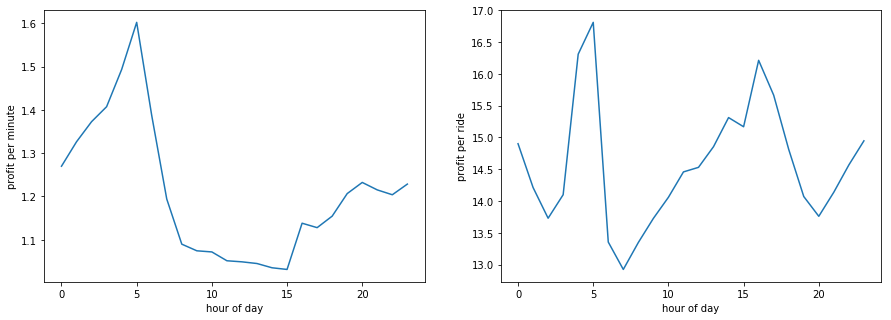

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(profit_per_minute_averages)
ax[0].set_xlabel('hour of day')
ax[0].set_ylabel('profit per minute')
ax[1].plot(gross_profit_averages)
ax[1].set_xlabel('hour of day')
ax[1].set_ylabel('profit per ride')

### Day of Week Conclusions
Analyzing the day of the week to maximize profit per ride, showed that all days are about the same with the exception of Saturday being the worst day.

However, when picking a day of the week for profits per minute, Sunday was the strongest contender, with Monday and Saturday following. The reason Sunday, Monday and Saturday are the highest has less to do with the high points of the day being high and more to do with the low points of the day not being as low as other days. With the assumption that you will not drive at a bad time of day, the day of the week you choose has little effect.

The plots below were in agreement with the regression analysis.

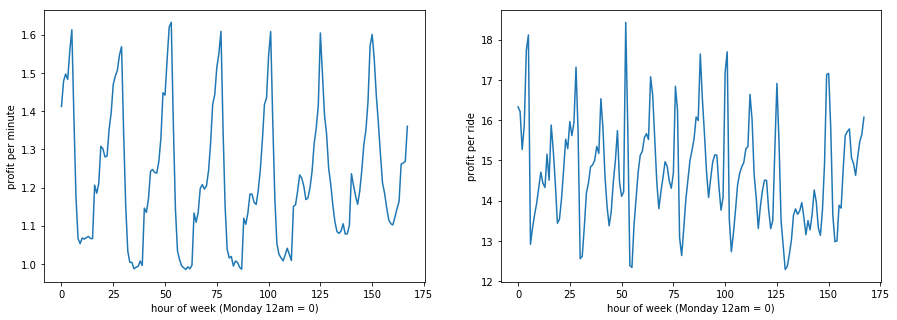

In [151]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(profit_per_minute_averages)
ax[0].set_xlabel('hour of week (Monday 12am = 0)')
ax[0].set_ylabel('profit per minute')
ax[1].plot(gross_profit_averages)
ax[1].set_xlabel('hour of week (Monday 12am = 0)')
ax[1].set_ylabel('profit per ride')

### Taxicab vs Taxivan Conclusions
Having a traditional taxicab allows you to take between 1 and 4 passengers. However, if you own a taxivan, you could take up to 6 passengers. The analysis shows there is little to no increase in profits per minute or profits per ride from taking 5 or 6 passengers. Due to the extra expenses associated with a taxi van, I would advise to stay away from them.

## Recommendations
With all that is known about the data and the constraints of only driving 10 hours a week, I would suggest one of the two following plans:

Be a taxi driver to and from JFK airport between 4am to 6am, 5 days a week.

If 4am to 6am are not your preferred working hours, I would recommend you drive people around the Upper East Side for 2 hours a night, 5 days a week. The later in the evening you can go, the better.

## Complications

The biggest complication I see in this data is what I will refer to as vacancy expense. Vacancy expense is the lost revenue from not having someone in your taxi at any given moment. Vacancy expense could have a key outcome on the above analysis as it could vary greatly between different locations and times of day.

Driving passengers from JFK airport may have a high profit per ride and profit per minute, but it might come with a higher vacancy expense than other types of rides. Likewise, driving late at night or early in the morning may be good for profit per ride and profit per minute, but it too could come with a higher than average vacancy expense.

## Future Data Desires

The data could be significantly aided by having a way to calculate the vacancy expense. Such a thing could be accomplished by having an ID on each taxi. If I had known which data had come from which taxi, I would have been able to calculate the timeframes in which the taxi was empty. From there I could have created a vacancy expense variable as well as analyzed different vacancy percentages for differnt zones, boroughs, times of day, and days of the week.

If I had known this information, I could determine if the increase in profits from driving between 4am and 6am would offset what I would assume would be a higher vacancy expense.

#### Information that was not particularly useful
- VendorID - The provider of the data did not appear to affect results
- RatecodeID - Not useful because 99% of the data was the standard rate
- improvement_surcharge - Almost all the data was 0.3
- mta_tax - Almost all the data was 0.5 